Module 1 .Financial Data Acquisition

In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a246c971888b2338fc920827a45b90fb19b855a5b54ed02ef8de3d173eaffbf6
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta

# Download TCS stock data (NSE: TCS.NS) for last 5 years
data = yf.download("TCS.NS", start="2018-01-01", end="2025-08-26")

# Reset index for easier handling
data.reset_index(inplace=True)

# Export raw data to CSV
data.to_csv("TCS_raw.csv", index=False)
print(" Data downloaded & saved as TCS_raw.csv")




/tmp/ipython-input-1100867864.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2018-01-01", end="2025-08-26")
[*********************100%***********************]  1 of 1 completed

 Data downloaded & saved as TCS_raw.csv


In [3]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2018-01-01,1176.523560,1198.403246,1171.809595,1192.844377,1351760
1,2018-01-02,1170.119385,1187.196291,1165.227581,1182.927038,1920290
2,2018-01-03,1173.432373,1186.929346,1170.119310,1170.475099,1257120
3,2018-01-04,1181.637329,1183.816362,1174.032755,1178.479849,913082
4,2018-01-05,1195.912598,1200.493127,1178.480009,1178.480009,1153706


In [4]:
data.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1884,2025-08-19,3016.199951,3025.000000,3011.100098,3011.199951,2650784
1885,2025-08-20,3098.600098,3103.399902,3010.899902,3010.899902,4952358
1886,2025-08-21,3102.600098,3130.000000,3083.100098,3130.000000,3230726
1887,2025-08-22,3054.000000,3095.699951,3050.000000,3086.000000,1593791
1888,2025-08-25,3140.600098,3152.000000,3077.100098,3087.300049,3448370


In [5]:
# Flatten MultiIndex columns
data.columns = [col[0] for col in data.columns]


In [6]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2018-01-01,1176.523560,1198.403246,1171.809595,1192.844377,1351760
1,2018-01-02,1170.119385,1187.196291,1165.227581,1182.927038,1920290
2,2018-01-03,1173.432373,1186.929346,1170.119310,1170.475099,1257120
3,2018-01-04,1181.637329,1183.816362,1174.032755,1178.479849,913082
4,2018-01-05,1195.912598,1200.493127,1178.480009,1178.480009,1153706


Module 2.Data Cleaning & Feature Engineering

In [7]:
data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


**2.1 If find missing value (Handling missing value)**

In [8]:
# Forward-fill then back-fill for missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


/tmp/ipython-input-2957152918.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipython-input-2957152918.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1889 non-null   datetime64[ns]
 1   Close   1889 non-null   float64       
 2   High    1889 non-null   float64       
 3   Low     1889 non-null   float64       
 4   Open    1889 non-null   float64       
 5   Volume  1889 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 88.7 KB


In [10]:
data.describe()

,Date,Close,High,Low,Open,Volume
count,1889,1889.000000,1889.000000,1889.000000,1889.000000,1.889000e+03
mean,2021-10-29 19:29:22.837480192,2819.028381,2847.008015,2792.150414,2820.125835,2.826335e+06
min,2018-01-01 00:00:00,1170.119385,1183.816362,1165.227581,1170.475099,0.000000e+00
25%,2019-12-06 00:00:00,1947.046143,1972.406283,1924.601960,1946.904746,1.744204e+06
50%,2021-10-29 00:00:00,3056.000000,3082.587069,3025.000000,3051.643938,2.375183e+06
75%,2023-09-25 00:00:00,3430.265869,3460.831271,3403.748808,3433.149033,3.258414e+06
max,2025-08-25 00:00:00,4476.749023,4514.598013,4435.705272,4498.623077,8.806715e+07
std,NaN,843.731913,849.474886,838.756508,843.993894,2.625092e+06


In [ ]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

**plot outliers for numerical columns value**

In [11]:
def plot_boxplot(data,column_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(y=data[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

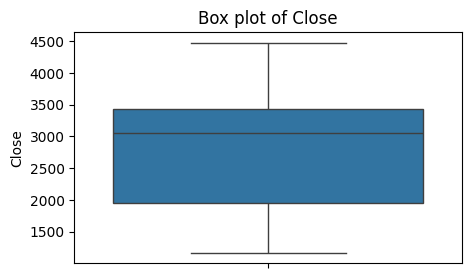

In [12]:
plot_boxplot(data,"Close")

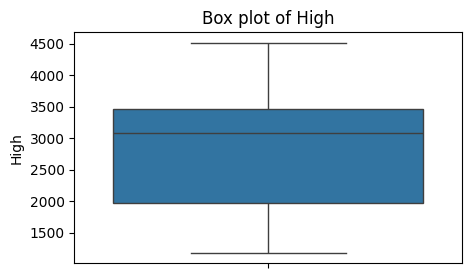

In [13]:
plot_boxplot(data,'High')

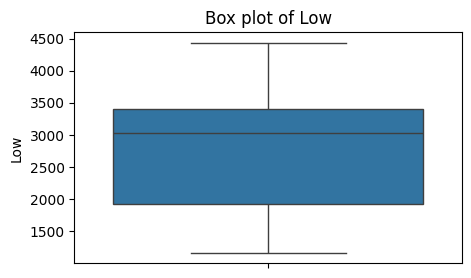

In [14]:
plot_boxplot(data,'Low')

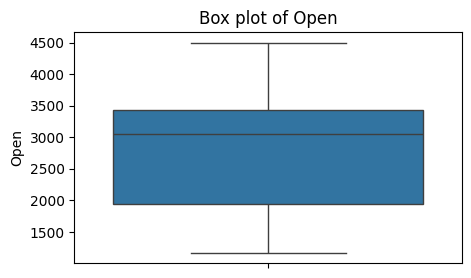

In [15]:
plot_boxplot(data,'Open')

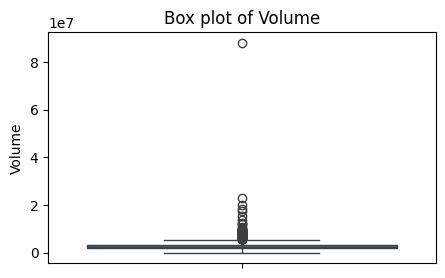

In [16]:
plot_boxplot(data,'Volume')

 **2.2 Handling Outliers (IQR Method)**

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower, upper=upper) # Removed axis argument

# Apply outlier handling on key price columns
for col in [('Open'), ('High'), ('Low'), ('Close'),('Volume')]: # Using correct MultiIndex column names
    remove_outliers_iqr(data, col)

print("Outliers handled using IQR method.")

Outliers handled using IQR method.


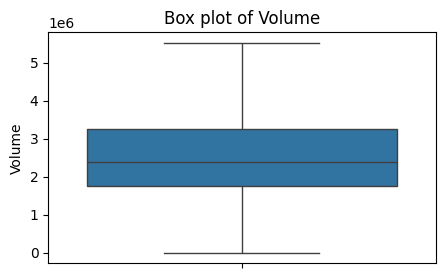

In [18]:
plot_boxplot(data,"Volume")

**2.3 Feature Engineering**

In [19]:
# Moving Averages
data['SMA_10'] = data[('Close')].rolling(window=10).mean()
data['SMA_50'] = data[('Close')].rolling(window=50).mean()
data['EMA_20'] = data[('Close')].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI)
data['RSI'] = ta.momentum.RSIIndicator(data[('Close')], window=14).rsi()

**2.4 Save Cleaned & Enhanced Data**

In [20]:

data.to_csv("TCS_cleaned_features.csv", index=False)
print("\n Cleaned & Feature engineered data saved as TCS_cleaned_features.csv")


 Cleaned & Feature engineered data saved as TCS_cleaned_features.csv


In [21]:
data.head()

,Date,Close,High,Low,Open,Volume,SMA_10,SMA_50,EMA_20,RSI
0,2018-01-01,1176.523560,1198.403246,1171.809595,1192.844377,1351760,NaN,NaN,1176.523560,NaN
1,2018-01-02,1170.119385,1187.196291,1165.227581,1182.927038,1920290,NaN,NaN,1175.913638,NaN
2,2018-01-03,1173.432373,1186.929346,1170.119310,1170.475099,1257120,NaN,NaN,1175.677327,NaN
3,2018-01-04,1181.637329,1183.816362,1174.032755,1178.479849,913082,NaN,NaN,1176.244946,NaN
4,2018-01-05,1195.912598,1200.493127,1178.480009,1178.480009,1153706,NaN,NaN,1178.118056,NaN


 **2.5 Visualization Examples**

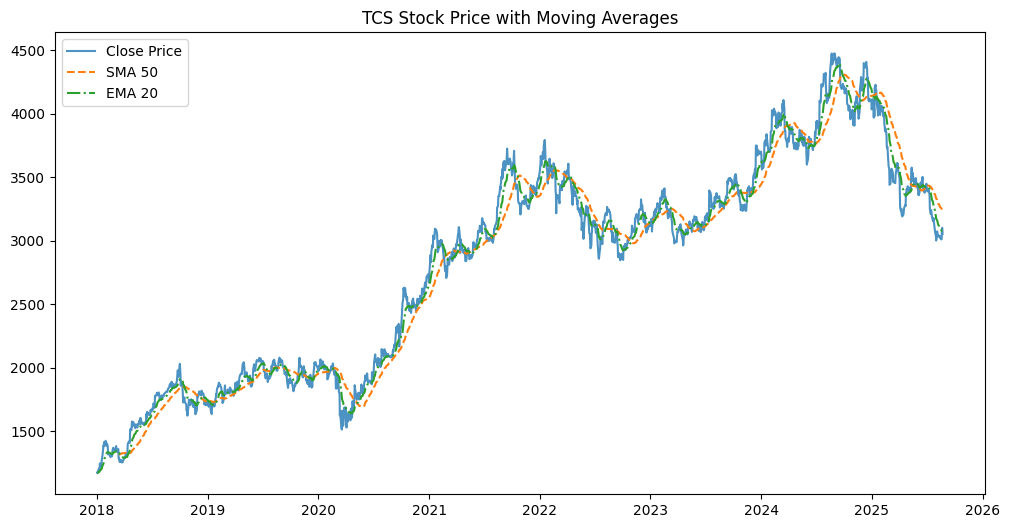

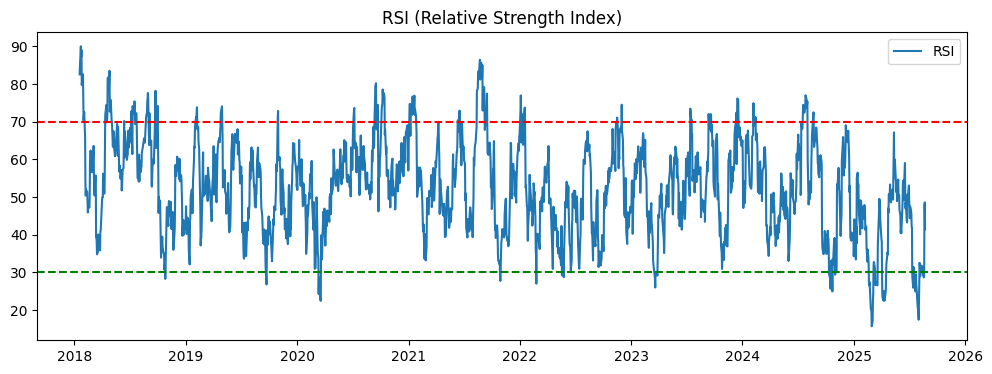

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.8)
plt.plot(data['Date'], data['SMA_50'], label='SMA 50', linestyle='--')
plt.plot(data['Date'], data['EMA_20'], label='EMA 20', linestyle='-.')
plt.title("TCS Stock Price with Moving Averages")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(data['Date'], data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI (Relative Strength Index)")
plt.legend()
plt.show()